# Analysis of a given area data, by Pietro Terna$^1$ and Stefano Terna$^2$  
$^1$ Univerity of Torino, Italy (retired) & Collegio Carlo Alberto, Italy  
$^2$ PhD, [tomorrowdata.io](https://tomorrowdata.io)

base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

area='Piemonte'

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regional_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

area_data=regional_data[regional_data.denominazione_regione==area]
area_data=area_data.rename(columns = {'data': 'dates'},inplace = False)

relevant_columns=['dates','ricoverati_con_sintomi','terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati'];
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colorDict={'ricoverati_con_sintomi':'lightgray', 'terapia_intensiva':'darkgray',
           'totale_ospedalizzati':'dimgray', 'isolamento_domiciliare':'brown', 
           'totale_positivi':'red','variazione_totale_positivi':' orange', 
           'nuovi_positivi':'olive', 'dimessi_guariti':'gold','deceduti':'black',
           'casi_da_sospetto_diagnostico':'fuchsia', 'casi_da_screening':'violet',
           'totale_casi':'blue', 'tamponi':'green', 'casi_testati':'lime'}
area_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

<br/>

# Definitions
**from the [Protezione Civile](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione) web site [in square brakets my addenda]**   
   
**ricoverati_con_sintomi <span style="color: red;">[stock in a given day]</span>**  
Ricoverati con sintomi - Hospitalised patients with symptoms  

**terapia_intensiva <span style="color: red;">[stock in a given day]</span>**  
Ricoverati in terapia intensiva	- Intensive Care  
  
**totale_ospedalizzati <span style="color: red;">[stock in a given day]</span>**  
Totale ospedalizzati - Total hospitalised patients  
  
**isolamento_domiciliare <span style="color: red;">[stock in a given day]</span>**  
Persone in isolamento domiciliare	Home confinement  
  
**totale_positivi <span style="color: red;">[stock in a given day]</span>**  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare) - Total amount of current positive cases (Hospitalised patients + Home confinement)  
  
**variazione_totale_positivi <span style="color: red;">[first difference of totale_positivi]</span>**  
Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente) - News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  
  
**nuovi_positivi <span style="color: red;">[first difference of totale_casi]</span>**NOOOO  
Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente) - News amount of current positive cases (totale_casi current day - totale_casi previous day)  
  
**dimessi_guariti <span style="color: red;">[cumulative values]</span>**  
Persone dimesse guarite - Recovered  
  
**deceduti <span style="color: red;">[cumulative values]</span>**  
Persone decedute - Death  
  
**casi_da_sospetto_diagnostico <span style="color: red;">[cumulative values]</span>**  
Casi positivi al tampone emersi da attività clinica - Positive cases emerged from clinical activity  
  
**casi_da_screening <span style="color: red;">[cumulative values]</span>**  
Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale - Positive cases emerging from surveys and tests, planned at national or regional level  
  
**totale_casi <span style="color: red;">[cumulative values]</span>**  
Totale casi positivi - Total amount of positive cases  
  
**tamponi <span style="color: red;">[cumulative values]</span>**  
Totale tamponi - Tests performed  
  
**casi_testati <span style="color: red;">[cumulative values]</span>**  
Totale dei soggetti sottoposti al test	Total number of people tested  

**<span style="color: red;">Please look at the appendix for data examples and confrontations</span>**  

<br/>


# Data from the last two days  
<br/>



In [2]:
area_data[-3:][relevant_columns]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5368,2020-11-05,3698,249,3947,40027,43974,2397,3171,36086,4520,37804.0,46776.0,84580,1095992,687826.0
5389,2020-11-06,3871,268,4139,43777,47916,3942,4878,36993,4549,39162.0,50296.0,89458,1117280,703606.0
5410,2020-11-07,4122,284,4406,47083,51489,3573,4437,37812,4594,40806.0,53089.0,93895,1134670,715993.0


### First differences  

In [38]:
area_data[relevant_columns].diff()[-2:]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5389,1 days,173.0,19.0,192.0,3750.0,3942.0,1545.0,1707.0,907.0,29.0,1358.0,3520.0,4878.0,21288.0,15780.0
5410,1 days,251.0,16.0,267.0,3306.0,3573.0,-369.0,-441.0,819.0,45.0,1644.0,2793.0,4437.0,17390.0,12387.0


<br/>

# Figure 1  
  
  
The introduction of 'casi_da_screening' profoundly modifies the 'totale_casi' count (a cumulative value) and – via 'isolamento_domiciliare' – also modifies the 'totale_positivi' count (a daily stock). Two reasons:   
  
(i) the overrepresentation of positive cases in the tested subjects is due to their characteristics (individuals with specific risk profiles);  
  
(ii) tracking cases via screening, we find asymptomatic positive persons who we were not accounting for in the first phase of the epidemic.

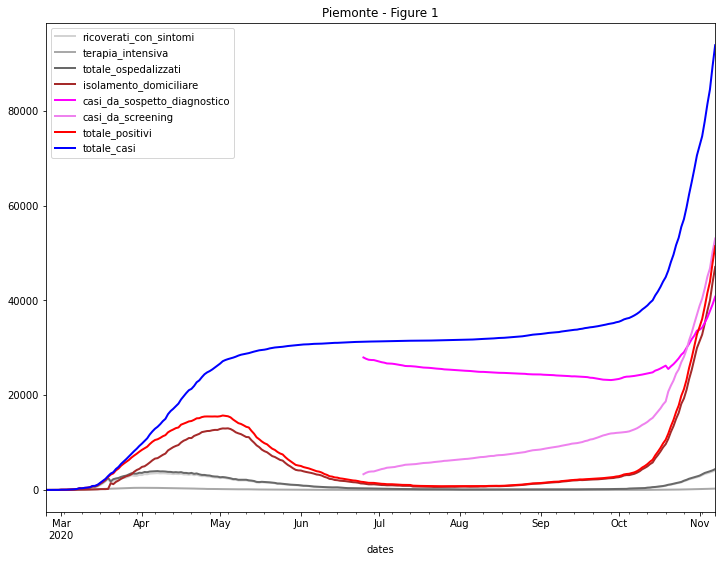

In [3]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['ricoverati_con_sintomi', 'terapia_intensiva',
                                         'totale_ospedalizzati','isolamento_domiciliare',
                                         'casi_da_sospetto_diagnostico','casi_da_screening',
                                         'totale_positivi','totale_casi'], title=area+" - Figure 1",
                            color=colorDict,lw=2);

<br/>

## Figure 1.1  
  

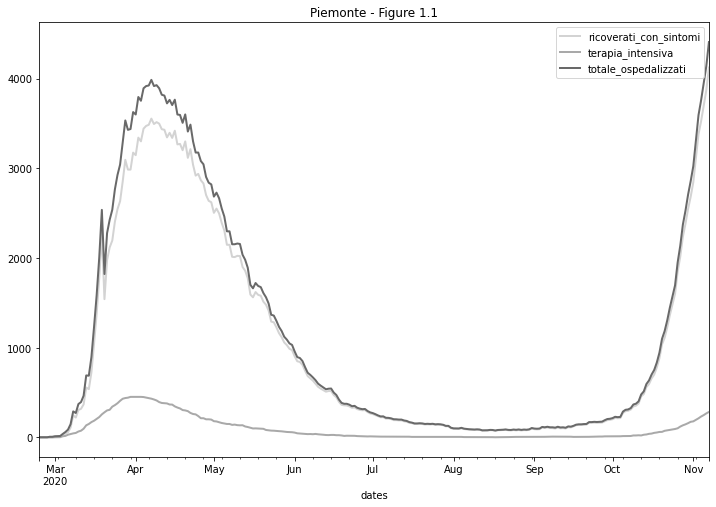

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
area_data.plot.line(x='dates',y=['ricoverati_con_sintomi',
                                    'terapia_intensiva','totale_ospedalizzati'], 
                            title=area+" - Figure 1.1",
                            color=colorDict,lw=2);

# Figure 2

In [34]:
area_data['casi_da_screening'].diff()[-1:].values[0]

2793.0

In [35]:
area_data['isolamento_domiciliare'].diff()[-1:].values[0]

3306.0

In [37]:
min (area_data['isolamento_domiciliare'].diff()[-1:].values[0], 
     area_data['casi_da_screening'].diff()[-1:].values[0])

2793.0

In [9]:
area_data['totale_casi_no_casi_da_screening']=area_data['totale_casi'] - \
                                          area_data['casi_da_screening'].fillna(0)

<AxesSubplot:title={'center':'Figure 2'}, xlabel='dates'>

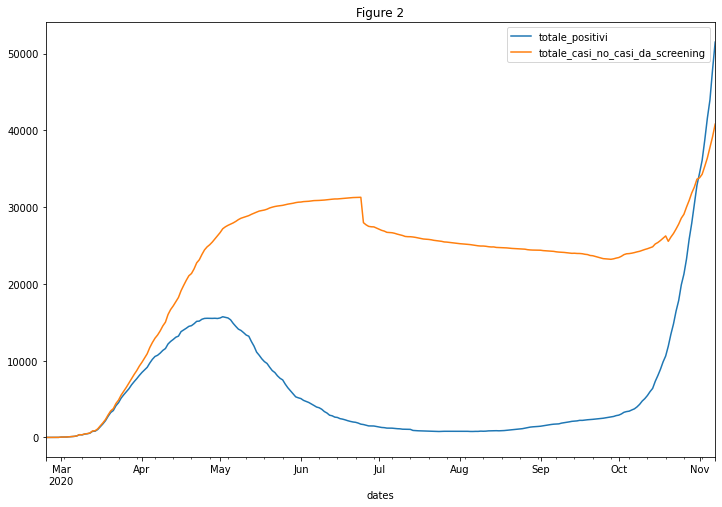

In [10]:
area_data.plot.line(x='dates',y=['totale_positivi','totale_casi_no_casi_da_screening'], 
                       title="Figure 2")

# Try to understand the discontinuity, in Figure 2:
### the break is at day 2020-06-03 with 3324 'casi_da_screening'  probably included, with similar amounts, in a segment of the previous days

In [11]:
area_data[100:130][['dates','totale_ospedalizzati', 'isolamento_domiciliare',
                            'totale_positivi','dimessi_guariti','deceduti','totale_casi',
                            'casi_da_sospetto_diagnostico','casi_da_screening',
                            'totale_casi_no_casi_da_screening']]

,dates,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,dimessi_guariti,deceduti,totale_casi,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi_no_casi_da_screening
2113,2020-06-03,885,3801,4686,22150,3898,30734,NaN,NaN,30734.0
2134,2020-06-04,851,3705,4556,22292,3910,30758,NaN,NaN,30758.0
2155,2020-06-05,783,3586,4369,22511,3927,30807,NaN,NaN,30807.0
2176,2020-06-06,721,3446,4167,22744,3934,30845,NaN,NaN,30845.0
2197,2020-06-07,697,3265,3962,22952,3941,30855,NaN,NaN,30855.0
2218,2020-06-08,669,3197,3866,23049,3954,30869,NaN,NaN,30869.0
2239,2020-06-09,638,3033,3671,23258,3961,30890,NaN,NaN,30890.0
2260,2020-06-10,599,2773,3372,23568,3976,30916,NaN,NaN,30916.0
2281,2020-06-11,577,2606,3183,23787,3988,30958,NaN,NaN,30958.0
2302,2020-06-12,557,2340,2897,24096,3996,30989,NaN,NaN,30989.0


# Figure 2b, still temporary, 
### duplication in 'isolamento_domiciliare'

In [12]:
area_data['correction']=\
area_data['casi_da_screening'].fillna(0).where(area_data['casi_da_screening'].fillna(0)
                                                      ==0, 3324)

area_data['totale_casi_no_casi_da_screening_corr']=\
area_data['totale_casi'] - area_data['casi_da_screening'].fillna(0) + \
area_data['correction']


#???
area_data['totale_positivi_no_casi_da_screening_corr']=\
area_data['totale_positivi'] - area_data['casi_da_screening'].fillna(0) + \
area_data['correction']

<AxesSubplot:title={'center':'Figure 2b'}, xlabel='dates'>

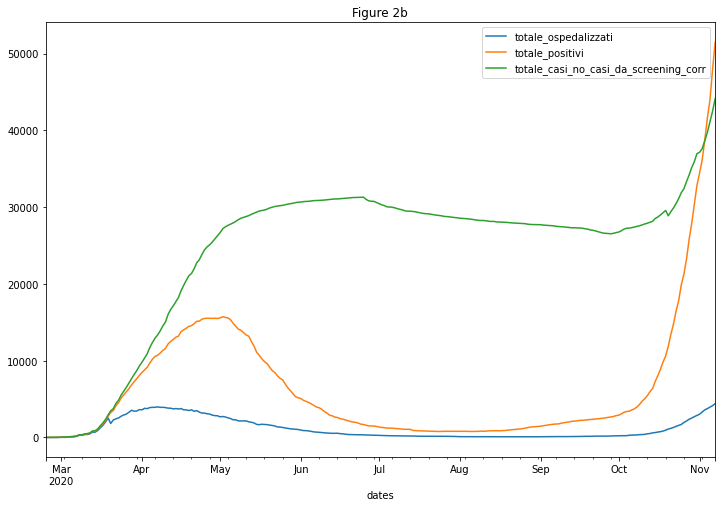

In [13]:
area_data.plot(x='dates',y=['totale_ospedalizzati',
                                    'totale_positivi',
                                    'totale_casi_no_casi_da_screening_corr'],title="Figure 2b")

# Figure 3

<AxesSubplot:title={'center':'Figure 3'}, xlabel='dates'>

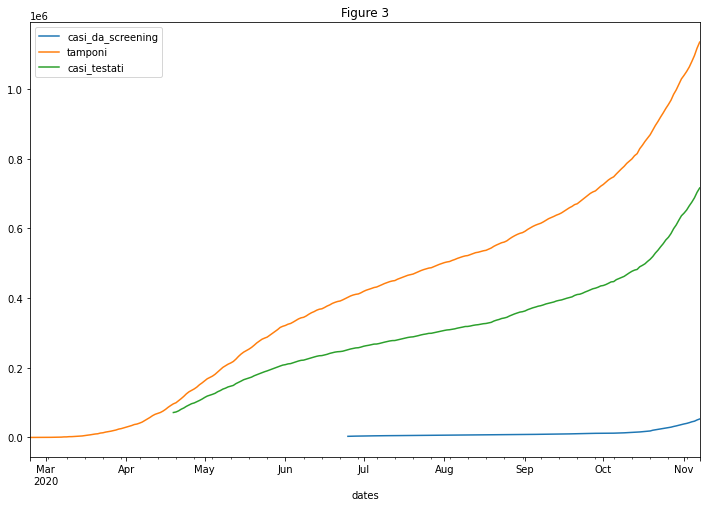

In [14]:
area_data.plot(x='dates',y=['casi_da_screening',
                                    'tamponi', 'casi_testati'], title="Figure 3")

# Ratios    
### casi_da_screening' / 'casi_testati' with a delay

In [15]:
area_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe()

,casi_da_screening,tamponi,casi_testati
count,30.000000,3.000000e+01,30.000000
mean,27545.100000,9.344124e+05,565658.066667
std,12130.170469,1.086895e+05,79195.202256
min,13352.000000,7.779670e+05,462323.000000
25%,16685.750000,8.411855e+05,494990.250000
50%,25005.000000,9.255525e+05,551642.500000
75%,36540.000000,1.025165e+06,633113.250000
max,53089.000000,1.134670e+06,715993.000000


In [16]:
print(
"Last 30 days ratio 'casi_da_screening' (30 days mean) / 'casi_testati' (30 days mean): %.2f%%" %
       (100 * area_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe().values[1][0] 
       /
              area_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe().values[1][2]) )

Last 30 days ratio 'casi_da_screening' (30 days mean) / 'casi_testati' (30 days mean): 4.87%


In [7]:
delay=5

In [10]:
print(area+" - Ratio 'casi_da_screening' %.10s / 'casi_testati' %.10s: %.2f%%" %
      (area_data[-1:][['dates']].values[0][0],
       area_data[-1-delay:-delay][['dates']].values[0][0],
       100*area_data[-1:][['casi_da_screening']].values[0][0] / \
    area_data[-1-delay:-delay][['casi_testati']].values[0][0]))

Piemonte - Ratio 'casi_da_screening' 2020-11-07 / 'casi_testati' 2020-11-02: 8.13%


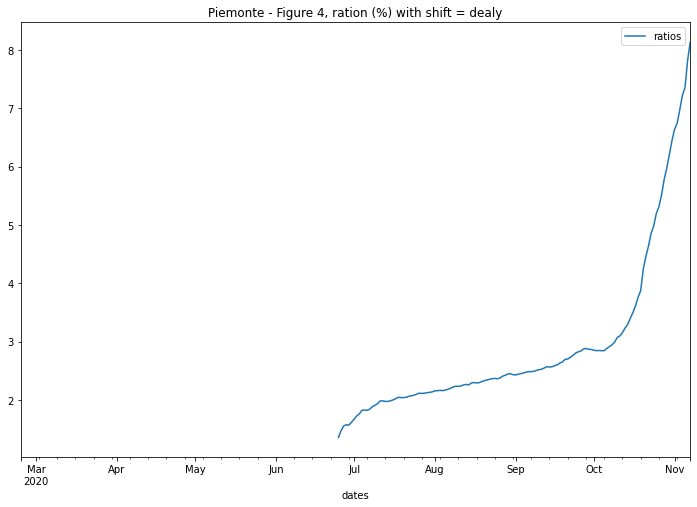

In [9]:
area_data['ratios']=100*area_data['casi_da_screening'] / \
    area_data['casi_testati'].shift(delay)
area_data.plot(x='dates',y=['ratios'], 
    title=area+" - Figure 4, ration (%) with shift = dealy");

<br/>

# Appendix: examples and confrontations
<br/>



In [20]:
# beginning of May
area_data[70:72][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']].head()

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
1483,2020-05-04,2391,161,2552,13010,15562,-76,192,8874,3186,NaN,NaN,27622,176078,123801.0
1504,2020-05-05,2307,155,2462,12861,15323,-239,152,9235,3216,NaN,NaN,27774,181316,126685.0


In [21]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
2391+161+13010

15562

In [22]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
15562+8874+3186

27622

In [23]:
# beginning of November
area_data[252:253][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']].head()

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5305,2020-11-02,3108,196,3304,32791,36095,1681,2003,34153,4415,34275.0,40388.0,74663,1050421,652762.0


In [24]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
3108+196+32791

36095

In [25]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
36095+34153+4415

74663

In [26]:
# and also
# verification 'totale_casi'='casi_da_sospetto_diagnostico'+'casi_da_screening'
34275+40388

74663